<b> Import Library, find available devices </b>

In [9]:
# Initialization code for Beta Multiplier Reference Testing.
# This block identifies and initializes the connected SMUs (Source Measure Units).
# If running for the first time, ensure the SMU names are correctly referenced in the subsequent code block.

# This program (ENTER DESCRIPTION)
# This program 
# This program creates a .csv file to save the measurements.

# The setup assumes the use of three SMUs:
# - 
# - 

import pyvisa                    # Importing the pyvisa library for instrument communication
import time                      # Importing the time module to handle time-related tasks (e.g., delays)
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for plotting graphs and visualizing data
import numpy as np               # Importing numpy for numerical operations, particularly with arrays
import pandas as dp              # Importing pandas as dp for data manipulation and analysis
import os                        # Importing os to interact with the operating system, such as handling file paths
import csv                       # Importing csv to read from and write to CSV files
from datetime import date           # Importing date to read current date
rm = pyvisa.ResourceManager()    # Create a ResourceManager object, which manages communication with instruments
rm.list_resources()              # List all available resources (e.g., connected instruments) managed by pyvisa

('USB0::0x2A8D::0x0101::MY57508183::INSTR',
 'USB0::0x2A8D::0x0101::MY54505624::INSTR',
 'GPIB6::6::INSTR',
 'GPIB6::20::INSTR',
 'GPIB6::21::INSTR',
 'USB0::0x0957::0x0607::MY45002108::0::INSTR',
 'USB0::0x0957::0x1796::MY57231548::0::INSTR',
 'USB0::0x0957::0x1796::MY57231553::0::INSTR',
 'USB0::0x0957::0x17B6::MY56310504::0::INSTR',
 'USB0::0x0957::0x2C07::MY57890777::0::INSTR',
 'USB0::0x0957::0x5707::MY53802060::0::INSTR')

In [10]:
#Establishing Connection for DUT 1 SMU
SM1 = rm.open_resource('GPIB6::20::INSTR')  # Open a connection to the instrument with the address 'ASRL3::INSTR' and assign it to SM_VIN
SM1.read_termination = '\n'             # Set the read termination character to a newline. This tells pyvisa when to consider a message as complete when reading from the instrument.
SM1.write_termination = '\n'            # Set the write termination character to a newline. This ensures that each command sent to the instrument is properly terminated.
SM1.baud_rate = 9600                    # Set the baud rate for serial communication to 9600. This is the speed at which data is transmitted over the serial connection.
print(SM1)                              # Print the resource object (SM_VIN) to display its properties
print(SM1.query('*IDN?'))               # Send the '*IDN?' command to the instrument and print its response. This command usually asks the instrument to identify itself (e.g., manufacturer, model number).

#Establishing Connection for DUT 2 SMU
SM2 = rm.open_resource('GPIB6::21::INSTR') # Open a connection to the instrument with the address 'ASRL4::INSTR' and assign it to SM_VOUT
SM2.read_termination = '\n'            # Set the read termination character to a newline for SM_VOUT, similar to SM_VIN
SM2.write_termination = '\n'           # Set the write termination character to a newline for SM_VOUT, similar to SM_VIN
SM2.baud_rate = 9600                   # Set the baud rate for SM_VOUT to 9600, ensuring both instruments communicate at the same speed
print(SM2)                             # Print the resource object (SM_VOUT) to display its properties
print(SM2.query('*IDN?'))              # Send the '*IDN?' command to the SM_VOUT instrument and print its response, identifying the instrument


#Establishing Connection for multimeter 1
MM1 = rm.open_resource('USB0::0x2A8D::0x0101::MY54505624::INSTR')
MM1.read_termination = '\n'             # Set the read termination character to a newline. This tells pyvisa when to consider a message as complete when reading from the instrument.
MM1.write_termination = '\n'
MM1.baud_rate = 9600
print(MM1)                             # Print the resource object (SM_VOUT) to display its properties
print(MM1.query('*IDN?'))   

#Establishing Connection for multimeter 2
MM2 = rm.open_resource('USB0::10893::257::MY57508183::0::INSTR')
MM2.read_termination = '\n'             # Set the read termination character to a newline. This tells pyvisa when to consider a message as complete when reading from the instrument.
MM2.write_termination = '\n'
MM2.baud_rate = 9600
print(MM2)                             # Print the resource object (SM_VOUT) to display its properties
print(MM2.query('*IDN?'))   


#Establishing Connection for Temperature Chamber
CHAMBER = rm.open_resource('GPIB6::6::INSTR') 
CHAMBER.read_termination = '\n'            
CHAMBER.write_termination = '\n'           
CHAMBER.baud_rate = 9600                  
print(CHAMBER)                            
print(CHAMBER.query('STATUS?'))              

VDD_MAX=1.2
currentRange = 1e-4
x=np.arange(0, 1.21, 0.01)
TEMPlist = [125, 100, 75, 50, 25, 0, -25, -50, -75, -100, -125, -150, -175]      # List of temperatures for test


GPIBInstrument at GPIB6::20::INSTR
KEITHLEY INSTRUMENTS INC.,MODEL 2401,4636506,B02 Jan 20 2021 10:19:49/B01  /W/N
GPIBInstrument at GPIB6::21::INSTR
KEITHLEY INSTRUMENTS INC.,MODEL 2401,4636504,B02 Jan 20 2021 10:19:49/B01  /W/N
USBInstrument at USB0::0x2A8D::0x0101::MY54505624::0::INSTR
Keysight Technologies,34465A,MY54505624,A.02.14-02.40-02.14-00.49-02-01
USBInstrument at USB0::10893::257::MY57508183::0::INSTR
Keysight Technologies,34465A,MY57508183,A.02.17-02.40-02.17-00.52-04-01
GPIBInstrument at GPIB6::6::INSTR
NNNNNNNNNNNNNNNNNN0


<b> Enter the Device under Test <b>

In [11]:
directory_name = input("Enter the Device under Test (DUT):")  # Prompt the user to input the temperature of the experiment, which will be used as the directory name
DUT="OmarTesting/DUT_"+str(directory_name)                                # DUT_"directory_name"
os.makedirs(DUT, exist_ok=True)                             # Create a directory with the given name. If the directory already exists, it won't raise an error due to exist_ok=True
DATE=str(DUT)+"/"+str(date.today())                         # Create another directory for test date within DUT name.  DUT_"directory_name"/yyyy-mm-dd
os.makedirs(DATE, exist_ok=True) 

<b> Test Sweep Definitions </b>

In [ ]:
def Chamber_INIT():
    CHAMBER.write("ON")
    CHAMBER.write("RATE=20")            # Sets the speed at which the chamber will ramp to change TEMP
    CHAMBER.write("WAIT=30")            # Sets the time that the chamber will wait once the desired temperature is reached before measurements start
    CHAMBER.write("HON")                # Turns heat on
    CHAMBER.write("CON")                # Turns cool on
    CHAMBER.write("PIDA=3")
    time.sleep(1) 

    print(CHAMBER.query("RATE?"))
    print(CHAMBER.query("WAIT?"))
    return

def SMUs_On():
    SM1.write(":SOUR:VOLT:MODE FIX")
    SM2.write(":SOUR:VOLT:MODE FIX")
    SM1.write("SOUR:VOLT:LEV 0")
    SM2.write("SOUR:VOLT:LEV 0")
    SM1.write("OUTP ON")
    SM2.write("OUTP ON")
    return

def SMUs_INIT():
    SM1.write(":CONF:CURR")                  # Configure the SMU to measure current
    SM1.write("OUTP:STAT 0")                 # Turn off the VIN source meter
    SM1.write("SOUR:VOLT:RANG 3.3")
    SM1.write("SENS:CURR:PROT:LEV 0.0105")   # Set the current protection level (compliance) to 10.5 mA. This limits the maximum current to protect the device under test.
    SM1.write("SENS:CURR:RANG 1E-2")         # Set the current measurement range to 10 mA. This sets the expected maximum current for accurate measurement.
    SM1.write("CURR:NPLC .01")

    SM2.write(":CONF:CURR")                  # Configure the SMU to measure current
    SM2.write("OUTP:STAT 0")                 # Turn off the VIN source meter
    SM2.write("SOUR:VOLT:RANG 3.3")
    SM2.write("SENS:CURR:PROT:LEV 0.0105")   # Set the current protection level (compliance) to 10.5 mA. This limits the maximum current to protect the device under test.
    SM2.write("SENS:CURR:RANG 1E-2")         # Set the current measurement range to 10 mA. This sets the expected maximum current for accurate measurement.
    SM2.write("CURR:NPLC .01")
    return

def MMs_INIT():
    MM1.write("ABOR")
    MM1.write("*RST; *CLS")
    MM1.write(":CONF:VOLT:DC")
    MM1.write("VOLT:NPLC .02")
    MM1.write("VOLT:DC:RANG 2")
    MM1.write("VOLT:DC:ZERO:AUTO OFF")

    MM2.write("ABOR")
    MM2.write("*RST; *CLS")
    MM2.write(":CONF:VOLT:DC")
    MM2.write("VOLT:NPLC .02")
    MM2.write("VOLT:DC:RANG 2")
    MM2.write("VOLT:DC:ZERO:AUTO OFF")
    return

def test_sweep(TEMP, local):
    y1=[]
    y2=[]
    for i in range (121):        # Loop from 0 to 120. Will be divided by 100 to get 0mV to 1.2V.                                                          
        val = i / 100                                        # Convert the current loop index into a floating-point voltage value
        ############ Sets VIN voltage ############                
        SM1.write("SOUR:VOLT:LEV " + str(val))          # Write the command to set the VIN voltage on the source meter        
        SM2.write("SOUR:VOLT:LEV " + str(val))                                      # Pause for .5 seconds to allow the system to stabilize
        #time.sleep(.05)
        ######## Measure ILOAD and others ########
        
        #MM1.write("*TRG")
        #time.sleep(.05)
        y1.append(MM1.query(":READ?"))
        y2.append(MM2.query(":READ?"))
    #y1=MM1.query("FETC?").split(',')
    SM1.write("SOUR:VOLT:LEV 0")          # Write the command to set the VIN voltage on the source meter        
    SM2.write("SOUR:VOLT:LEV 0")

    # Generate and format a V/V plots for a given temperature
    fig, M1plot = plt.subplots(layout='constrained')
    M1plot.set_title('Device 1 Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
    M1plot.set_xlabel('Input Voltage (V)', fontdict={'fontsize': 12})
    M1plot.set_ylabel('Output Voltage (V)', fontdict={'fontsize': 12})
    M1plot.set_yticks(np.arange(0, 1.3, 0.1))
    M1plot.set_xticks(np.arange(0, 1.3, 0.1))
    M1plot.tick_params(axis='both', which='major', labelsize=10)
    M1plot.set_xlim(0, 1.2)
    M1plot.set_ylim(0, 1.2)
    M1plot.plot(x, np.asarray(y1, dtype='float'))
    M1plot.grid()
    plt.close(fig)
    fig.savefig(os.path.join(local, "Device_1_Sweep_T_" + str(TEMP) + ".png"))


    fig, M2plot = plt.subplots(layout='constrained')
    M2plot.set_title('Device 2 Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
    M2plot.set_xlabel('Input Voltage (V)', fontdict={'fontsize': 12})
    M2plot.set_ylabel('Output Voltage (V)', fontdict={'fontsize': 12})
    M2plot.set_yticks(np.arange(0, 1.3, 0.1))
    M2plot.set_xticks(np.arange(0, 1.3, 0.1))
    M2plot.tick_params(axis='both', which='major', labelsize=10)
    M2plot.set_xlim(0, 1.2)
    M2plot.set_ylim(0, 1.2)
    M2plot.plot(x, np.asarray(y2, dtype='float'))
    M2plot.grid()
    plt.close(fig)
    fig.savefig(os.path.join(local, "Device_2_Sweep_T_" + str(TEMP) + ".png"))

    return(y1, y2)



<b> Test Protocol </b>

In [ ]:
################## Initial creation and format of overall IV curves ##################
# Create a color map for the plots
cm=plt.get_cmap('gist_rainbow')

# Create a figure for the overall Vout plot for the 1st Device
M1fig, M1plot = plt.subplots(layout='constrained')
M1plot.set_title('Device 1 Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
M1plot.set_xlabel('Input Voltage (V)', fontdict={'fontsize': 12})
M1plot.set_ylabel('Output Voltage (V)', fontdict={'fontsize': 12})
M1plot.set_yticks(np.arange(0, 1.3, 0.1))
M1plot.set_xticks(np.arange(0, 1.3, 0.1))
M1plot.tick_params(axis='both', which='major', labelsize=10)
M1plot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
M1plot.set_xlim(0, 1.2)
M1plot.set_ylim(0, 1.2)
M1plot.grid()

# Create a figure for the overall Vout plot for the 2nd Device
M2fig, M2plot = plt.subplots(layout='constrained')
M2plot.set_title('Device 2 Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
M2plot.set_xlabel('Input Voltage (V)', fontdict={'fontsize': 12})
M2plot.set_ylabel('Output Voltage (V)', fontdict={'fontsize': 12})
M2plot.set_yticks(np.arange(0, 1.3, 0.1))
M2plot.set_xticks(np.arange(0, 1.3, 0.1))
M2plot.tick_params(axis='both', which='major', labelsize=10)
M2plot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
M2plot.set_xlim(0, 1.2)
M2plot.set_ylim(0, 1.2)
M2plot.grid()


Chamber_INIT()
time.sleep(1)
SMUs_INIT()
MMs_INIT()
time.sleep(1)
SMUs_On()
time.sleep(1)


for TEMP in TEMPlist:
    local=str(DATE)+"/TEMP_"+str(TEMP)                          # The temperature of the experiment gets set as the sub directory name. DUT_"directory_name"/yyyy-mm-dd/TEMP_"TEMP"
    os.makedirs(local, exist_ok=True)                           # Create a directory with the given name. If the directory already exists, it won't raise an error due to exist_ok=True
    
    CHAMBER.write("WAIT=30")                                    # Resets the wait time of the temp chamber to 30 minutes so it doesn't time out mid test
    CHAMBER.write("SET=" + str(TEMP))
    # TODO: There is probably a better way to check for temperature settling and do wait time
    while (CHAMBER.query("STATUS?")[3] == 'N'):                 # Checks if the temperature chamber has arrived at TEMP yet or not
        time.sleep(15)
        print(CHAMBER.query("STATUS?"))  
    print(CHAMBER.query("STATUS?"))
    time.sleep(300)                                             # Soak time
    y1, y2 = test_sweep(TEMP, local)

    
    M1plot.plot(x, np.asarray(y1, dtype='float'), label="T=" + str(TEMP) + " °C")
    M2plot.plot(x, np.asarray(y2, dtype='float'), label="T=" + str(TEMP) + " °C")


for line in M1plot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in M2plot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
M1fig.savefig(os.path.join(DATE, "Device_1_Sweep.png"))
M2fig.savefig(os.path.join(DATE, "Device_2_Sweep.png"))
    



<b> Example Sweep (w/o Temp Chamber) <b>

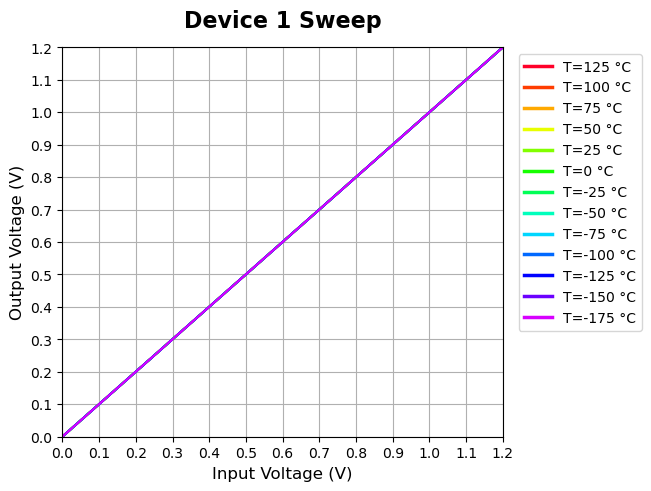

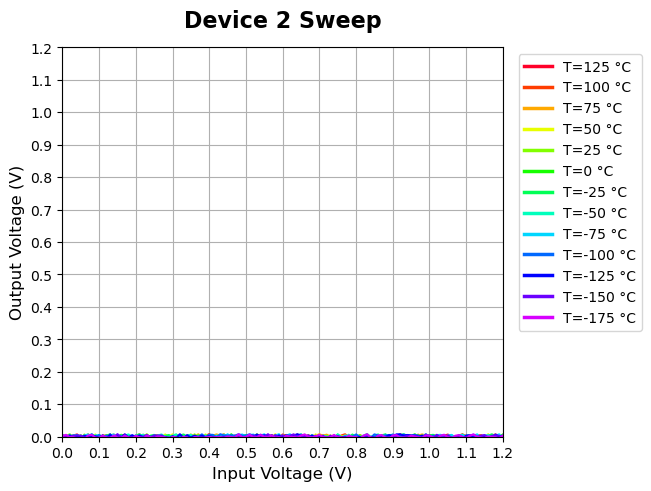

In [ ]:
################## Initial creation and format of overall IV curves ##################
# Create a color map for the plots
cm=plt.get_cmap('gist_rainbow')

# Create a figure for the overall Vout plot for the 1st Device
M1fig, M1plot = plt.subplots(layout='constrained')
M1plot.set_title('Device 1 Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
M1plot.set_xlabel('Input Voltage (V)', fontdict={'fontsize': 12})
M1plot.set_ylabel('Output Voltage (V)', fontdict={'fontsize': 12})
M1plot.set_yticks(np.arange(0, 1.3, 0.1))
M1plot.set_xticks(np.arange(0, 1.3, 0.1))
M1plot.tick_params(axis='both', which='major', labelsize=10)
M1plot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
M1plot.set_xlim(0, 1.2)
M1plot.set_ylim(0, 1.2)
M1plot.grid()

# Create a figure for the overall Vout plot for the 2nd Device
M2fig, M2plot = plt.subplots(layout='constrained')
M2plot.set_title('Device 2 Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
M2plot.set_xlabel('Input Voltage (V)', fontdict={'fontsize': 12})
M2plot.set_ylabel('Output Voltage (V)', fontdict={'fontsize': 12})
M2plot.set_yticks(np.arange(0, 1.3, 0.1))
M2plot.set_xticks(np.arange(0, 1.3, 0.1))
M2plot.tick_params(axis='both', which='major', labelsize=10)
M2plot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
M2plot.set_xlim(0, 1.2)
M2plot.set_ylim(0, 1.2)
M2plot.grid()


SMUs_INIT()
MMs_INIT()
time.sleep(1)
SMUs_On()
time.sleep(1)



for TEMP in TEMPlist:
#TEMP = 25       #Temporary temperature setting for room temperature testing
    local=str(DATE)+"/TEMP_"+str(TEMP)               # The temperature of the experiment gets set as the sub directory name. DUT_"directory_name"/yyyy-mm-dd/TEMP_"TEMP"
    os.makedirs(local, exist_ok=True)                # Create a directory with the given name. If the directory already exists, it won't raise an error due to exist_ok=True
    
    y1, y2 = test_sweep(TEMP, local)

    
    M1plot.plot(x, np.asarray(y1, dtype='float'), label="T=" + str(TEMP) + " °C")
    M2plot.plot(x, np.asarray(y2, dtype='float'), label="T=" + str(TEMP) + " °C")
for line in M1plot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in M2plot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)

M1fig.savefig(os.path.join(DATE, "Device_1_Sweep.png"))
M2fig.savefig(os.path.join(DATE, "Device_2_Sweep.png"))

    




In [ ]:
#CHAMBER.write("SET=25")
CHAMBER.write("STOP")